In [2]:
import pandas as pd
import statsmodels.api as sm

# 1.) Import Data from FRED

In [3]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)
data

,FedFunds,Unemployment,HousingStarts,Inflation
1947-01-01,NaN,NaN,NaN,21.480
1947-02-01,NaN,NaN,NaN,21.620
1947-03-01,NaN,NaN,NaN,22.000
1947-04-01,NaN,NaN,NaN,22.000
1947-05-01,NaN,NaN,NaN,21.950
...,...,...,...,...
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619
2023-11-01,5.33,3.7,1560.0,307.917


In [4]:
data.index = pd.to_datetime(data.index)
data.index

DatetimeIndex(['1947-01-01', '1947-02-01', '1947-03-01', '1947-04-01',
               '1947-05-01', '1947-06-01', '1947-07-01', '1947-08-01',
               '1947-09-01', '1947-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', length=924, freq=None)

In [29]:
data = data.dropna()
data

,FedFunds,Unemployment,HousingStarts,Inflation
1959-01-01,2.48,6.0,1657.0,29.010
1959-02-01,2.43,5.9,1667.0,29.000
1959-03-01,2.80,5.6,1620.0,28.970
1959-04-01,2.96,5.2,1590.0,28.980
1959-05-01,2.90,5.1,1498.0,29.040
...,...,...,...,...
2023-07-01,5.12,3.5,1451.0,304.348
2023-08-01,5.33,3.8,1305.0,306.269
2023-09-01,5.33,3.8,1356.0,307.481
2023-10-01,5.33,3.8,1359.0,307.619


# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [6]:
split_1 = int(len(data) * 0.6)  
split_2 = int(len(data) * 0.9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [7]:
X_in = data_in.iloc[:, 1:]  
y_in = data_in.iloc[:, 0]              
X_out = data_out.iloc[:, 1:]
y_out = data_out.iloc[:, 0]
X_hold = data_hold.iloc[:, 1:]
y_hold = data_hold.iloc[:, 0]

In [9]:
# Add Constants
X_in = sm.add_constant(X_in)  
X_out = sm.add_constant(X_out)  
X_hold = sm.add_constant(X_hold)  

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [18]:
model1 = sm.OLS(y_in, X_in).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FedFunds   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     14.83
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           3.09e-09
Time:                        23:08:25   Log-Likelihood:                -1202.0
No. Observations:                 467   AIC:                             2412.
Df Residuals:                     463   BIC:                             2429.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4750      0.985      3.529      0.000       1.540       5.410
Unemployment      0.5307      0.106      5.009      0.000       0.323       0.739
HousingStarts    -0.0005      0.000     -1.046      0.296      -0.001       0.000
Inflation         0.0077      0.004      2.173      0.030       0.001       0.015
==============================================================================
Omnibus:                       77.750   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.849
Skew:                           1.039   Prob(JB):                     2.11e-27
Kurtosis:                       4.413   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 4.) Recreate the graph fro your model

In [15]:
import matplotlib.pyplot as plt

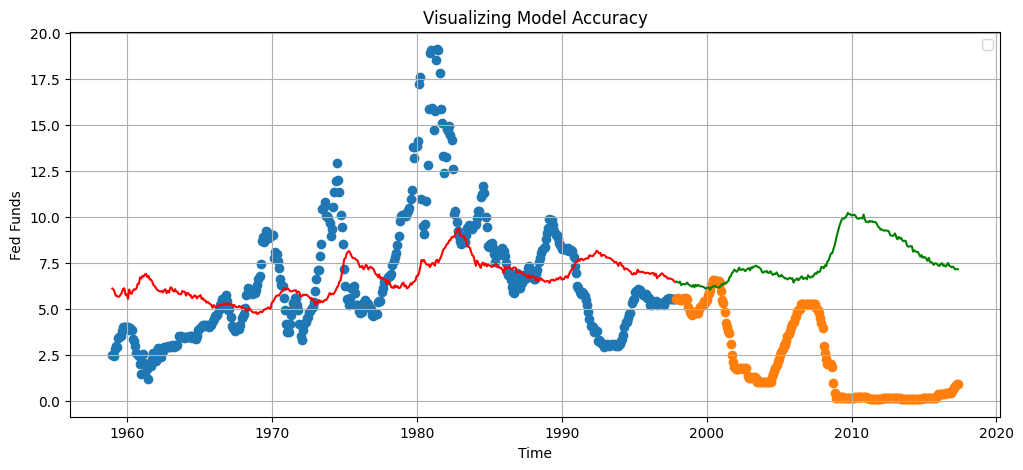

In [38]:
plt.figure(figsize=(12, 5))


pre_in = model1.predict(X_in)
pre_out = model1.predict(X_out)
pre_hold = model1.predict(X_hold)
plt.scatter(data_in.index, y_in, label='In-sample Actual')
plt.plot(data_in.index, pre_in, label='In-sample Predicted', color = 'red')
plt.scatter(data_out.index, y_out, label='Out-of-sample Actual')
plt.plot(data_out.index, pre_out, label='Out-of-sample Predicted',color = 'green')


plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend([])
plt.grid()
plt.show()


## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
in_mse_1 = mean_squared_error(y_in, pre_in)
out_mse_1 = mean_squared_error(y_out, pre_out)

In [34]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168641
Outsample MSE :  40.360827835668566


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [24]:
from sklearn.preprocessing import PolynomialFeatures

Degree 1: In-sample MSE = 10.071422013168641, Out-of-sample MSE = 40.36082783565212


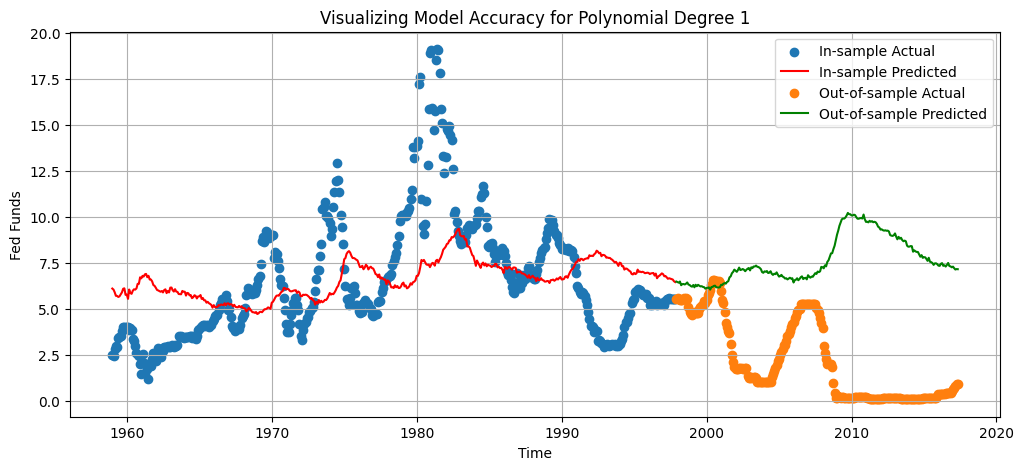

Degree 2: In-sample MSE = 3.863477139276067, Out-of-sample MSE = 481.4465099024015


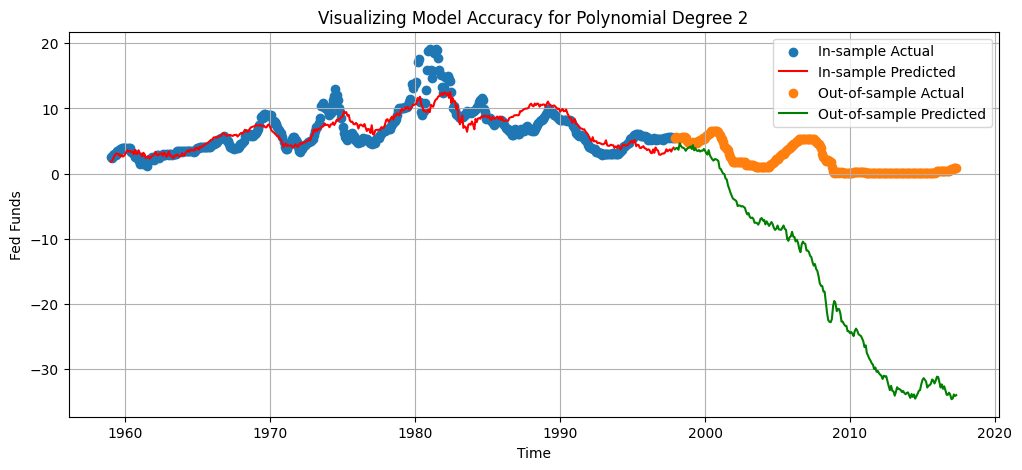

Degree 3: In-sample MSE = 1.872363628831326, Out-of-sample MSE = 371.7672613994206


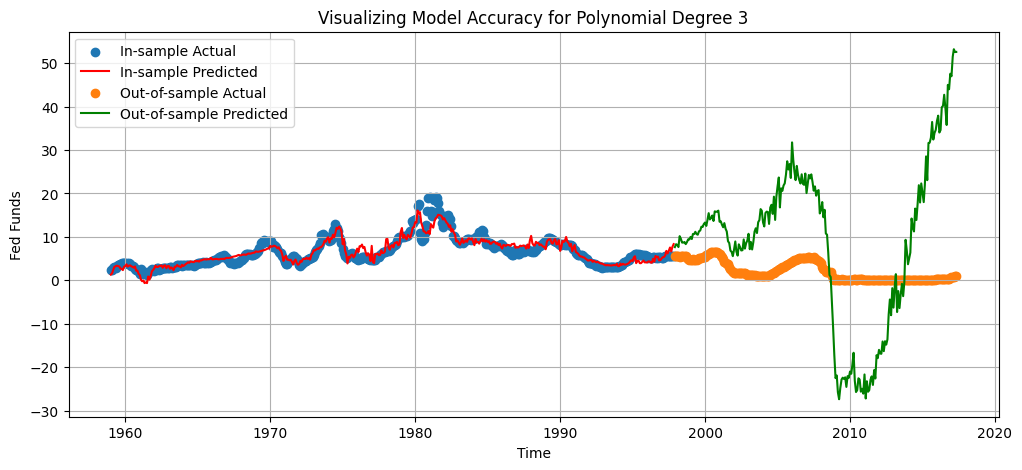

In [39]:
for degree in [1, 2, 3]:
    poly = PolynomialFeatures(degree)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    X_hold_poly = poly.transform(X_hold)

    model = sm.OLS(y_in, X_in_poly).fit()

    plt.figure(figsize=(12, 5))

    pre_in = model.predict(X_in_poly)
    pre_out = model.predict(X_out_poly)
    pre_hold = model.predict(X_hold_poly)

    plt.scatter(data_in.index, y_in, label='In-sample Actual')
    plt.plot(data_in.index, pre_in, label='In-sample Predicted', color = 'red')
    plt.scatter(data_out.index, y_out, label='Out-of-sample Actual')
    plt.plot(data_out.index, pre_out, label='Out-of-sample Predicted',color = 'green')

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title(f"Visualizing Model Accuracy for Polynomial Degree {degree}")
    plt.legend()
    plt.grid()
    
    in_mse = mean_squared_error(y_in, pre_in)
    out_mse = mean_squared_error(y_out, pre_out)
    print(f"Degree {degree}: In-sample MSE = {in_mse}, Out-of-sample MSE = {out_mse}")

    plt.show()


# 7.) State your observations :

Model accuracy in forecasting the federal funds rate at different polynomial degrees is shown. As the complexity of the model increases, although the fit to the training samples improves, the model's predictive ability on new data decreases, especially during periods of large data fluctuations, which indicates that the model may be overfitting. 